In [1]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import confidence_planner as cp

# example dataset and evaluation procedure
X, y = datasets.load_breast_cancer(return_X_y=True)
clf = svm.SVC(gamma=0.001)
n_splits = 10
n_test = len(y)//(n_splits+1)
tscv = TimeSeriesSplit(n_splits=n_splits, test_size=n_test)

accuracies = []
# Perform training and testing on splits
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predicted)
    accuracies.append(accuracy)

acc = np.mean(accuracies)
ci = cp.estimate_confidence_interval(n_test, acc, confidence_level=0.90, method="progressive")
sample = cp.estimate_sample_size(interval_radius=0.05, confidence_level=0.90, method="progressive")

print(f"Mean progressive validation accuracy: {acc}")
print(f"90% CI: {ci}")
print(f"Test samples needed for a 0.05 radius 90% CI: {sample}")

Mean progressive validation accuracy: 0.8549019607843139
90% CI: [0.6835254038970625, 1.0]
Test samples needed for a 0.05 radius 90% CI: 600


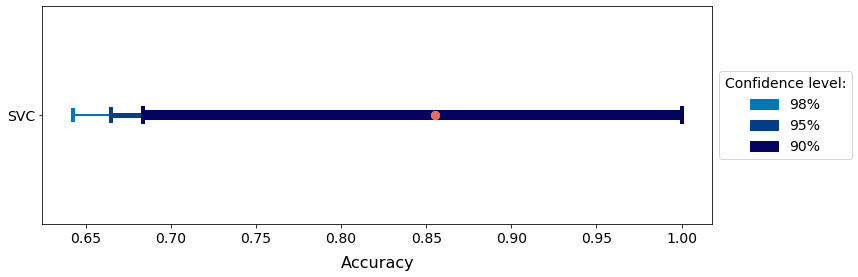

In [2]:
fig = cp.plot_classifier_intervals(
    ["SVC"], 
    [n_test], 
    [acc],
    method="progressive",
    width=12,
    height=4
);